## Imports:

In [1]:
# Personal library
import wrangle as w
import explore as e
import model as m

# Libraries working for arrays and dataframe
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#image viz
from IPython.display import Image



# Project Description:
* COVID-19, an airborne virus, had a significant global impact from 2020 to 2021, particularly affecting countries with low-income populations. This project analyzes the correlation between pre-existing conditions and COVID-19 patients, utilizing an anonymized dataset provided by the government of Mexico for the years 2020 and 2021.


# Project Goals: 
* The project goal is to develop a model that accurately predicts the risk level of COVID-19 patients, enabling hospitals and clinics to enhance their preparedness and assessment. This will ensure the availability of essential resources, including tools, equipment, and staff, to effectively manage future patients, irrespective of their test results or patient volume.

# Data Dictionary:


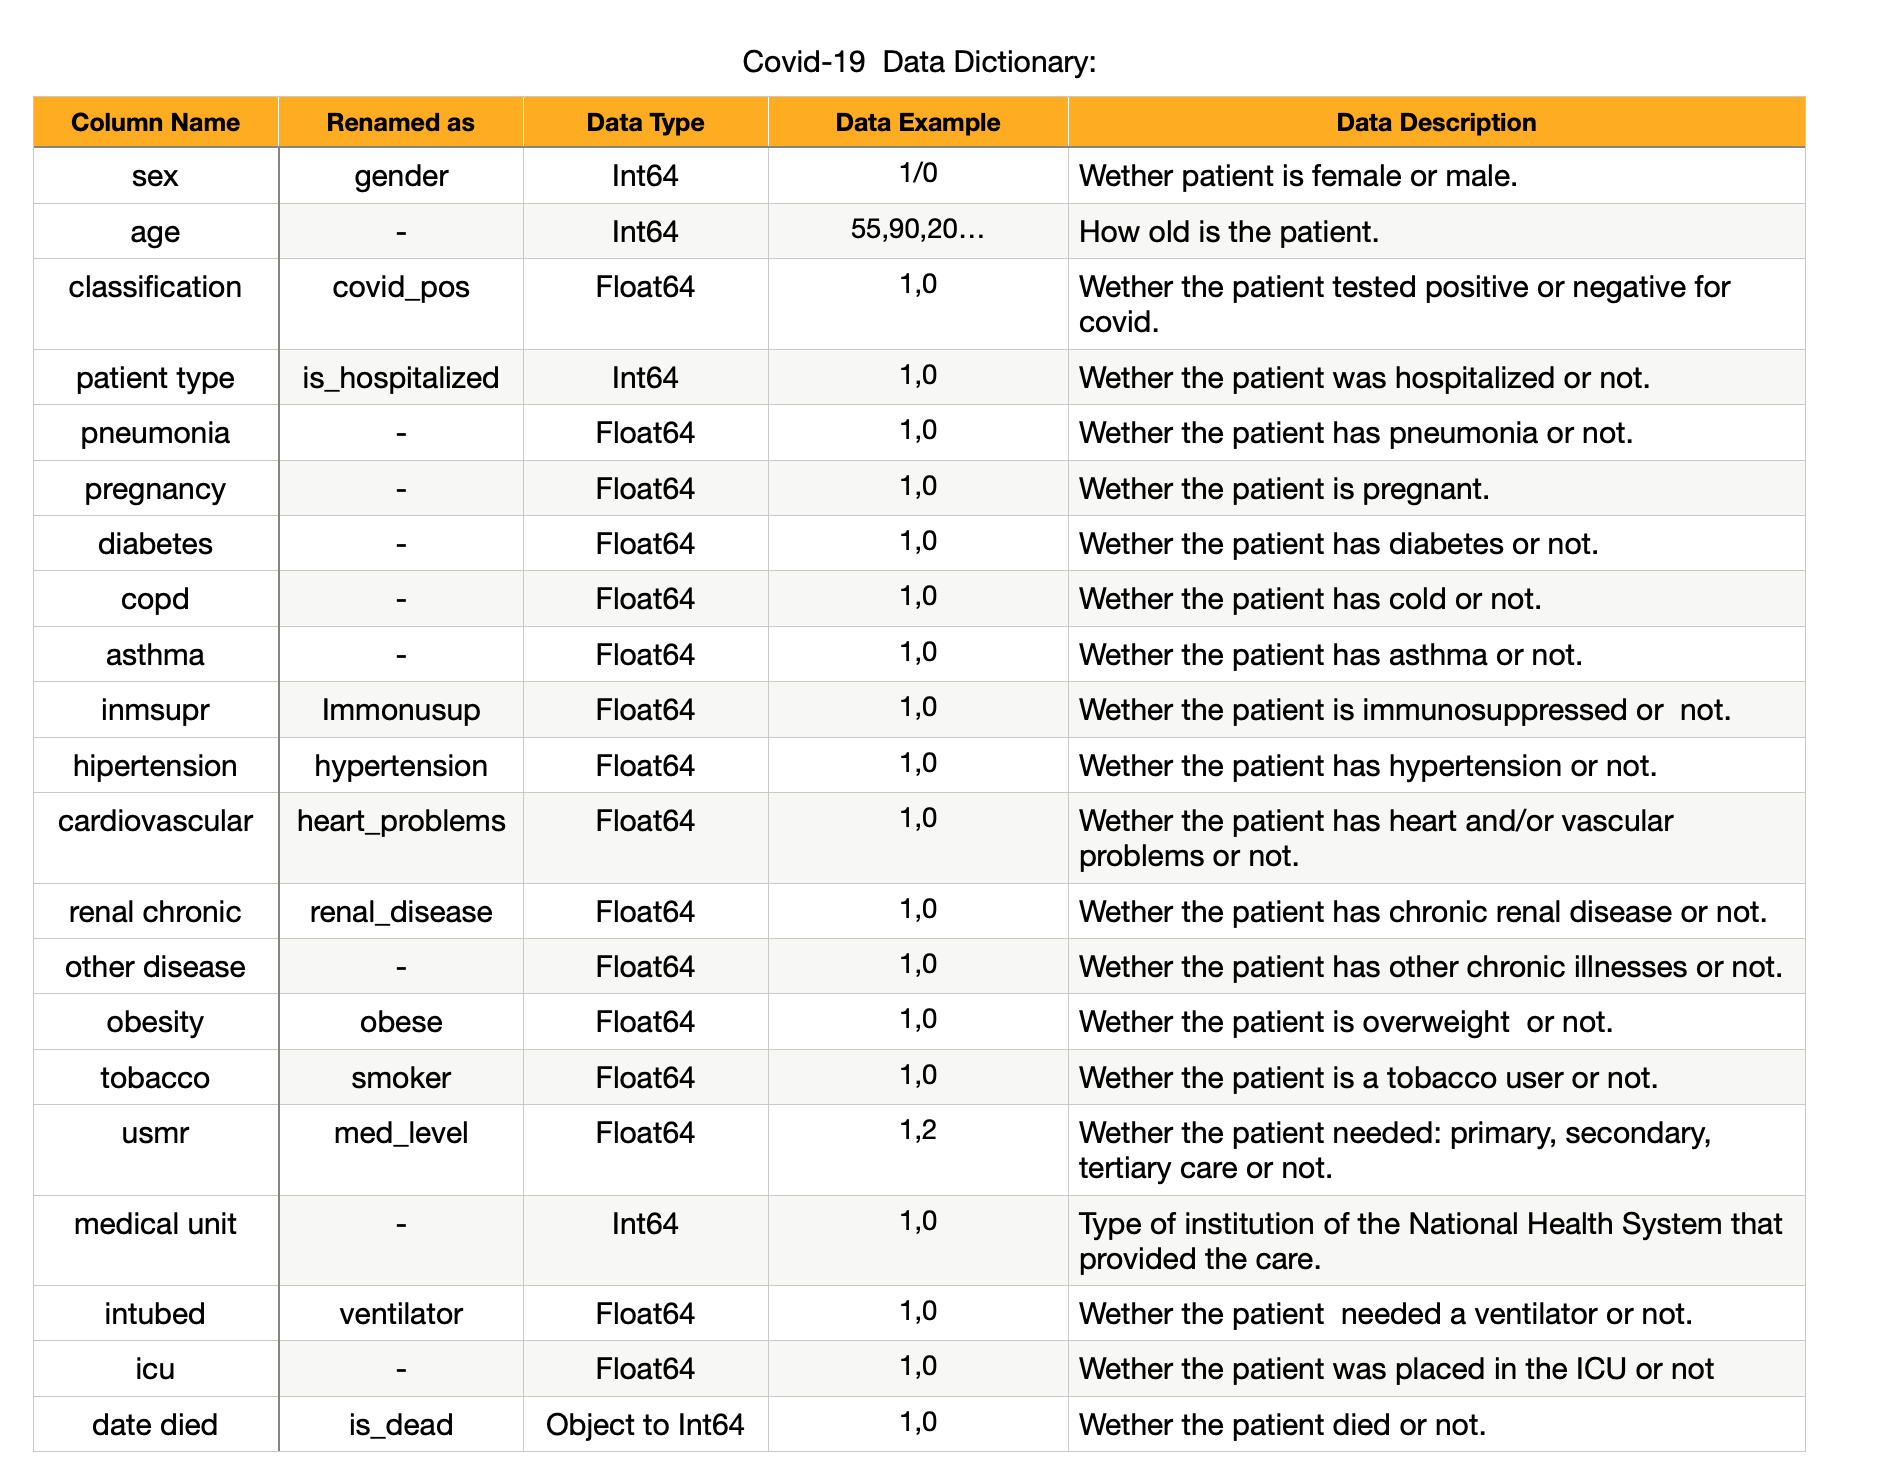

In [2]:
#Run Data Dictionary file path
Image(filename='/Users/chellyannmoreno/codeup-data-science/covid19-project/Data Dictionary.png')

# Wrangle!

## Acquire Data:

* Data was acquired from Kaggle.com 
* Data was saved as a csv ('covid_data.csv')
* Data contains 1,048,575 rows and 21 columns.
* Each row represents a anonymous individual and  the medical history.

## Prepare Data:
* Converted column names to lowercase for consistency.
* Renamed columns appropriately to improve clarity.
* Replaced boolean values "1" and "2" with "1" and "0" respectively.
* Replaced unknown values categorized as "97," "99," or "98" with NaN (Not a Number).
* Filled null values with 0, assuming that nulls indicate that the patient did not experience any pre-conditions or medical history at the time of COVID-19 testing, or did not succumb to the virus.
* Dropped columns "medical_unit" and "other_diseases" due to insufficient information and lack of hospital/clinic names.
* Created the "risk_sum" and "risk_category" columns to define risk categories (low, medium, high) based on the sum of relevant pre-conditions. (target variable)
* Created the "age_risk" column to identify patients over 60 years old as high-risk individuals.
* No scaling was conducted.
* Data is split into train, validate and test for exploration and model prediction.
* Outliers were kept.

In [3]:
# Function to retrieve and prepare data for splitting data:
df=w.covid_data()

In [4]:
# Function to split data into train, validate and test
train,validate,test=w.split_data(df,'risk_category')

In [5]:
# data visualization... PEEP!
train.head()

,med_level,gender,is_hospitalized,is_dead,ventilator,pneumonia,age,pregnant,diabetes,copd,...,hypertension,heart_problems,obese,renal_disease,smoker,covid_pos,icu,age_risk,risk_sum,risk_category
899001,2,0,1,0,0.0,0.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low,1.0,Low
2463,1,1,1,0,0.0,0.0,26.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,low,3.0,Medium
1008528,1,0,1,0,0.0,0.0,28.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low,2.0,Medium
442614,2,0,1,0,0.0,0.0,38.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,low,2.0,Medium
182228,2,1,1,0,0.0,0.0,26.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low,1.0,Low


In [6]:
# Data overall info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629145 entries, 899001 to 668391
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   med_level        629145 non-null  int64  
 1   gender           629145 non-null  int64  
 2   is_hospitalized  629145 non-null  int64  
 3   is_dead          629145 non-null  int64  
 4   ventilator       629145 non-null  float64
 5   pneumonia        629145 non-null  float64
 6   age              629145 non-null  float64
 7   pregnant         629145 non-null  float64
 8   diabetes         629145 non-null  float64
 9   copd             629145 non-null  float64
 10  asthma           629145 non-null  float64
 11  immunosup        629145 non-null  float64
 12  hypertension     629145 non-null  float64
 13  heart_problems   629145 non-null  float64
 14  obese            629145 non-null  float64
 15  renal_disease    629145 non-null  float64
 16  smoker           629145 non-null 

In [7]:
# Data description/ stats...
train.describe().T

,count,mean,std,min,25%,50%,75%,max
med_level,629145.0,1.632921,0.482009,1.0,1.0,2.0,2.0,2.0
gender,629145.0,0.501109,0.499999,0.0,0.0,1.0,1.0,1.0
is_hospitalized,629145.0,0.809206,0.392927,0.0,1.0,1.0,1.0,1.0
is_dead,629145.0,0.073573,0.261075,0.0,0.0,0.0,0.0,1.0
ventilator,629145.0,0.032206,0.176546,0.0,0.0,0.0,0.0,1.0
pneumonia,629145.0,0.133589,0.340211,0.0,0.0,0.0,0.0,1.0
age,629145.0,41.761219,16.898751,0.0,30.0,40.0,53.0,121.0
pregnant,629145.0,0.007737,0.087622,0.0,0.0,0.0,0.0,1.0
diabetes,629145.0,0.118955,0.323736,0.0,0.0,0.0,0.0,1.0
copd,629145.0,0.014429,0.119252,0.0,0.0,0.0,0.0,1.0


# Data Exploration!

## Correlation Visualization:

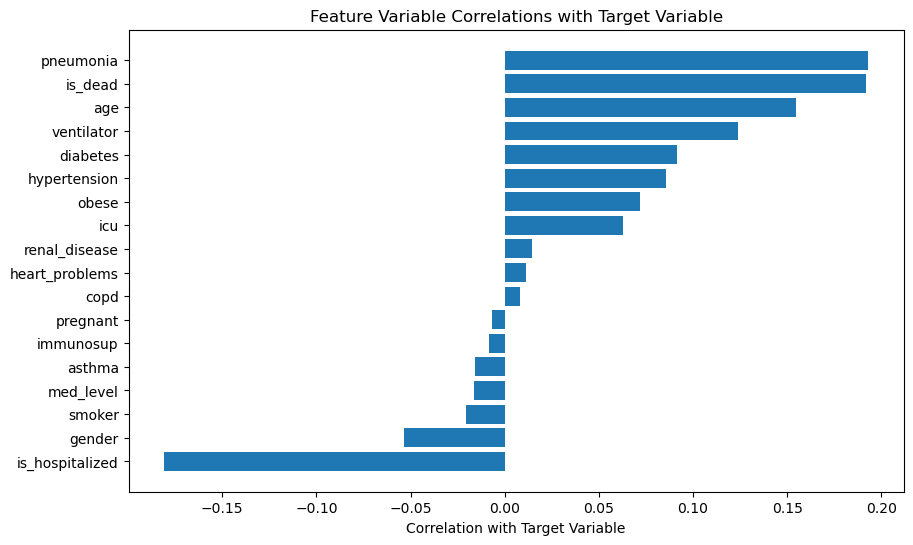

In [8]:
# Function to visualize correlations
e.plot_correlations(train)

## Initial Hypotheses:
1. Patient who died have a direct correlation with covid positive tests?
2. Does hospitalizations have a correlation with covid positive tests?
3. Does being a smoker have a correlation with covid positive tests?
4. Patient with heart problems have a correlation with covid positive tests?
5. Does age risk have a relation with covid positive cases?

## 1. Patient who died have a direct correlation with covid positive tests?

H_$0$ : Death has no correlation with positive covid tests.
  
H_$A$: Death has a correlation with positive covid tests.

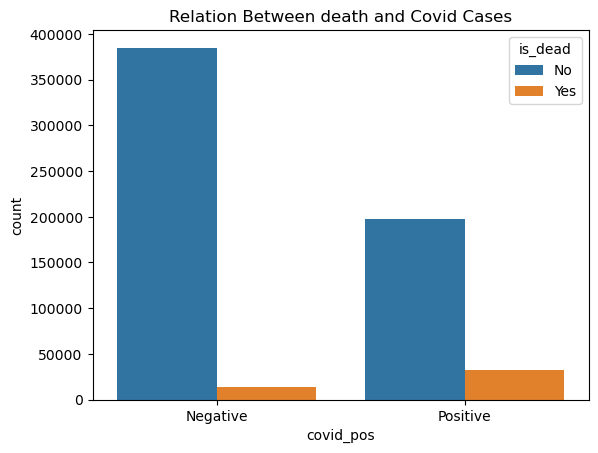

In [9]:
#function to visualize relation between variables
e.countplot(train,'covid_pos','is_dead',title='Relation Between death and Covid Cases')

In [10]:
# Function to perform stats test:
observed=pd.crosstab(train.covid_pos,train.is_dead)
e.chi_square_test(observed)

Observed Contingency Table:
is_dead         0      1
covid_pos               
0.0        385048  14204
1.0        197809  32084
Expected Contingency Table:
[[369877.88659848  29374.11340152]
 [212979.11340152  16913.88659848]]
Chi-Square Test Statistic:
23141.8456871022
p-value:
0.0
We reject the null hypothesis.


### Insight:
* The analysis of the visualization indicates a higher mortality rate among patients who tested positive for COVID-19. However, it is noteworthy that a considerable number of individuals have survived despite testing positive.
* Additionally, the Chi-Square test reject the null hypothesis, which reveals a significant correlation between positive COVID-19 cases and patients with underlying health conditions. 
* In summary, while there is an increased risk for severe outcomes among COVID-19 positive patients with pre-existing conditions, the survival rate remains notably higher, emphasizing the importance of timely interventions and comprehensive healthcare measures. 

## 2. Does hospitalizations have a correlation with covid positive tests?


H_$0$ : Hospitalization has no correlation with positive covid tests.
  
H_$A$: Hospitalization has a correlation with positive covid tests.

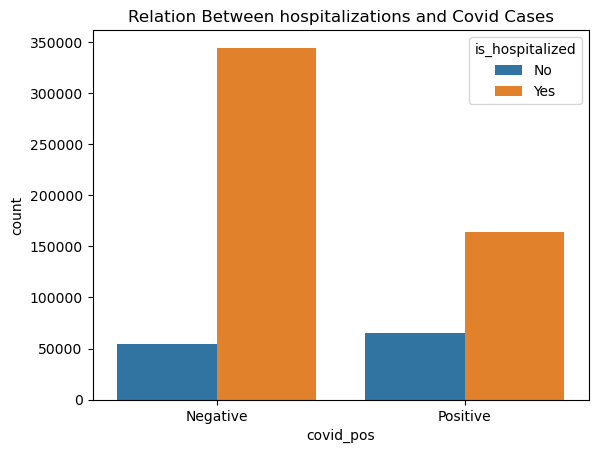

In [11]:
#function to visualize relation between variables
e.countplot(train,'covid_pos','is_hospitalized',title='Relation Between hospitalizations and Covid Cases')

In [12]:
# Function to perform stats test:
observed=pd.crosstab(train.covid_pos,train.is_hospitalized)
e.chi_square_test(observed)

Observed Contingency Table:
is_hospitalized      0       1
covid_pos                     
0.0              54633  344619
1.0              65404  164489
Expected Contingency Table:
[[ 76174.8282574 323077.1717426]
 [ 43862.1717426 186030.8282574]]
Chi-Square Test Statistic:
20601.521869346478
p-value:
0.0
We reject the null hypothesis.


### Insight:
* In summary, the bar plot reveals a negative correlation between hospitalization and positive COVID-19 cases. A higher proportion of patients who were hospitalized tested negative for COVID-19 compared to those with a positive test result.
* Nonetheless, a significant number of patients with positive COVID-19 tests still required hospitalization. 
* The results of the chi-square test confirm a statistically significant correlation between positive COVID-19 cases and hospitalization.

### 3. Does being a smoker have a correlation with covid positive tests?
H_$0$ : Smoking has no correlation with positive covid tests.
  
H_$A$: Smoking has a correlation with positive covid tests.

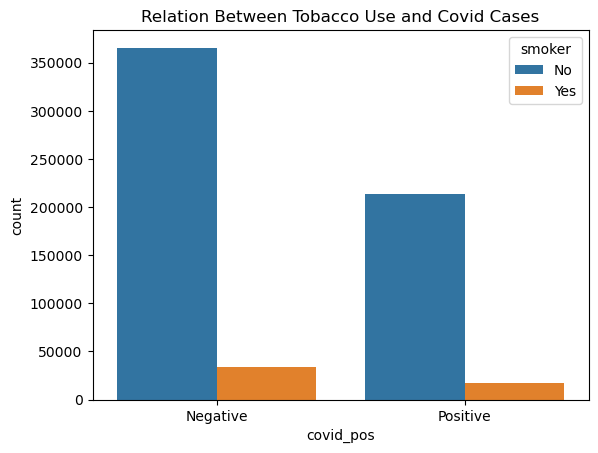

In [13]:
#function to visualize relation between variables
e.countplot(train,'covid_pos','smoker',title='Relation Between Tobacco Use and Covid Cases')

In [14]:
# Function to perform stats test:
observed=pd.crosstab(train.covid_pos,train.smoker)
e.chi_square_test(observed)

Observed Contingency Table:
smoker        0.0    1.0
covid_pos               
0.0        365565  33687
1.0        213139  16754
Expected Contingency Table:
[[367242.41535417  32009.58464583]
 [211461.58464583  18431.41535417]]
Chi-Square Test Statistic:
261.3734743037066
p-value:
8.612604769565337e-59
We reject the null hypothesis.


### Insight:
* The bar plot indicates that there are more positive COVID-19 cases among non-tobacco users compared to tobacco users.
* The results of the chi-square test support this observation by rejecting the null hypothesis, indicating a statistically significant correlation between tobacco use and COVID-19 cases. 
* Overall, the correlation can be assumed to be negative, as non-tobacco users have a higher likelihood of testing positive for COVID-19.

## 4. Patient with heart problems have a correlation with covid positive tests?
H_$0$ : Heart problems has no correlation with positive covid tests.
  
H_$A$: Heart problems has a correlation with positive covid tests.

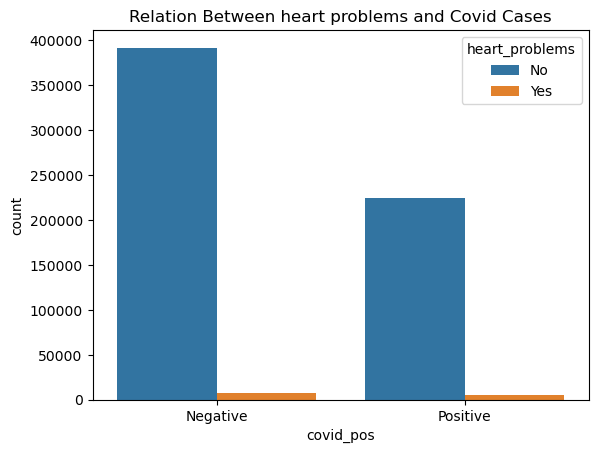

In [15]:
#function to visualize relation between variables
e.countplot(train,'covid_pos','heart_problems',title='Relation Between heart problems and Covid Cases')

### Insight:
* In summary, the visualization suggests that there may not be a strong correlation between heart problems and positive COVID-19 cases. 
* The bar plot reveals a higher rate of positive COVID-19 cases among individuals without heart problems compared to those with heart problems. This indicates that the presence of heart problems may not significantly contribute to an increased likelihood of testing positive for COVID-19.

## 5. Does age have a correlation with covid positive cases?

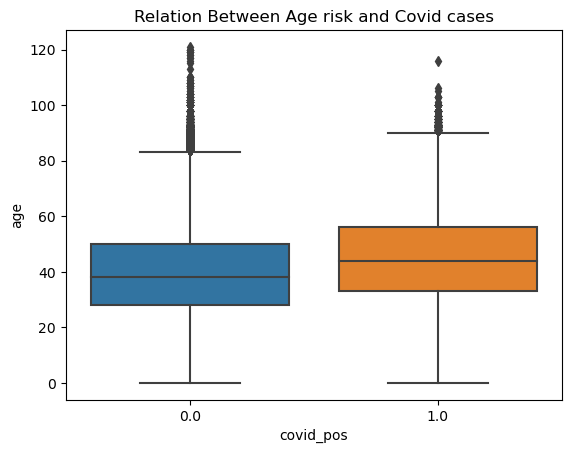

In [16]:
#function to visualize relation between variables
e.cat_cont_plot(train,'covid_pos','age',title='Relation Between Age risk and Covid cases')

In [17]:
# Function to perform t_test:
e.cat_cont_t_test(train, 'covid_pos','age')

We reject the null hypothesis.


(-124.09807055189115, 0.0)

### Insight:
* the bar plot reveals that individuals between the ages of 30 and 60+ have a higher likelihood of testing positive for COVID-19. Specifically, adults in the age range of 30 to 50 are more exposed to the virus due to their work and increased engagement in society. 
* Additionally, the t-test results indicate a significant correlation between individuals around their 40s and COVID-19 cases, as the null hypothesis is rejected. This suggests that individuals in this age group may face a higher risk of contracting the virus.

## Exploration Summary:
1. The analysis reveals a higher mortality rate among COVID-19 positive patients, but a significant number of individuals have survived.
2. Positive COVID-19 cases show a significant correlation with underlying health conditions, as indicated by the Chi-Square test.
3. Hospitalization is negatively correlated with positive COVID-19 cases, although a substantial number of positive cases still require hospitalization.
4. Non-tobacco users have a higher proportion of positive COVID-19 cases compared to tobacco users, supported by the Chi-Square test.
5. Heart problems may not have a strong correlation with positive COVID-19 cases, as individuals without heart problems have a higher rate of positive cases.
6. Adults between the ages of 30 and 60+ are more likely to test positive for COVID-19, with a higher exposure risk for individuals in their 30s to 50s, potentially due to work and increased societal engagement.

# MVP Modeling:
* For the MVP model stage we would be using all of the features except for risk_sum and agre risk to run our models.
* The baseline is: 48.0%, medium risk patients.
* Data is split into x and y variables for modeling purposes.
* Metrics used is Accuracy, and target variable would be treated as classification.

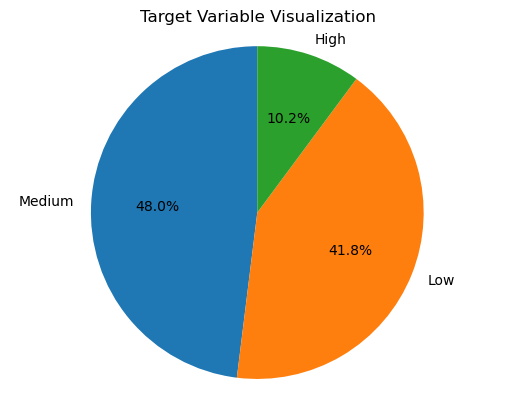

In [18]:
##Function to visualize the Target Variable:
e.create_pie_chart(train,'risk_category', 'Target Variable Visualization')

In [19]:
#Data split between x and y variables:
x_train=train[['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu']]
y_train=train.risk_category
x_validate=validate[['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu']]
y_validate=validate.risk_category
x_test=test[['med_level', 'gender', 'is_hospitalized', 'is_dead', 'ventilator',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'heart_problems', 'obese', 'renal_disease',
       'smoker', 'covid_pos', 'icu']]
y_test=test.risk_category

### Decision Tree modeling:
1. max_depth: 5
2. max_depth 10
3. max_depth 20

In [20]:
# #1 Function to run decision tree modeling accuracy scores:
m.run_decision_tree(x_train, x_validate, y_train, y_validate, 5)

Decision Tree Results:
Train score: 0.9099396800419617
Validate score:0.908800038147009


In [21]:
# #2 Function to run decision tree modeling accuracy scores:
m.run_decision_tree(x_train, x_validate, y_train, y_validate, 10)

Decision Tree Results:
Train score: 0.9847253017984725
Validate score:0.9839353408196838


In [22]:
# #3 Function to run decision tree modeling accuracy scores:
m.run_decision_tree(x_train, x_validate, y_train, y_validate, 20)

Decision Tree Results:
Train score: 1.0
Validate score:0.9996471401664163


### Random Forest modeling:
1. max_depth : 5, n_estimator: 10
2. max_depth : 10, n_estimator: 10
3. max_depth : 2, n_estimator 10

In [23]:
# #1 Function to run random forest modeling accuracy scores:
m.run_random_forest(x_train, x_validate, y_train, y_validate,5,5)


Random Forest Results:
Train score: 0.864137837859317
Validate score:0.8629377965333905


In [24]:
# #2 Function to run random forest modeling accuracy scores:
m.run_random_forest(x_train, x_validate, y_train, y_validate,10,10)

Random Forest Results:
Train score: 0.9761724244808431
Validate score:0.975094771475574


In [25]:
# #3 Function to run random forest modeling accuracy scores:
m.run_random_forest(x_train, x_validate, y_train, y_validate,2,10)

Random Forest Results:
Train score: 0.742243838860676
Validate score:0.7418544214767661


### Insight:
* All of our models exhibit superior performance compared to the baseline accuracy of 48%.
* Among the models, the random forest with a maximum depth of 2 and 10 estimators stands out as the most favorable choice. This model demonstrates good generalization and avoids overfitting, yielding an impressive accuracy of 74.2%, surpassing the baseline by 26.2%.
* With the implementation of this model, we can confidently predict individuals with a medium level of risk before or after undergoing COVID-19 testing, contributing to effective risk assessment and management strategies.


# 2nd iteration:
* In this second iteration, we will explore the integration of clustering techniques into our modeling process. By leveraging clustering algorithms, we aim to uncover valuable patterns and distinct groups within the data. This approach has the potential to enhance the accuracy and interpretability of our models, ultimately improving our understanding and decision-making capabilities, and minimize overfitting.
* In this clustering stage, there is no need to scale the data as the features to be used for clustering are already on a binary scale of 1 and 0.


## Clustering!

### Cluster Model 1:

In [26]:
#Choosing the features that would be used for our clustering test 1
feature_set_1 = ['pneumonia','is_hospitalized']
train_cluster=x_train[feature_set_1]
val_cluster=x_validate[feature_set_1]
test_cluster=x_test[feature_set_1]
# calculating the KMeans on all  data sets to use for modeling
train_cluster=m.calculate_kmeans(train_cluster,3)
val_cluster=m.calculate_kmeans(val_cluster,3)
test_cluster=m.calculate_kmeans(test_cluster,3)

In [27]:
#Adding cluster column to train data for modeling purposes
train['cluster1']=train_cluster['cluster']
validate['cluster1']=val_cluster['cluster']
test['cluster1']=test_cluster['cluster']

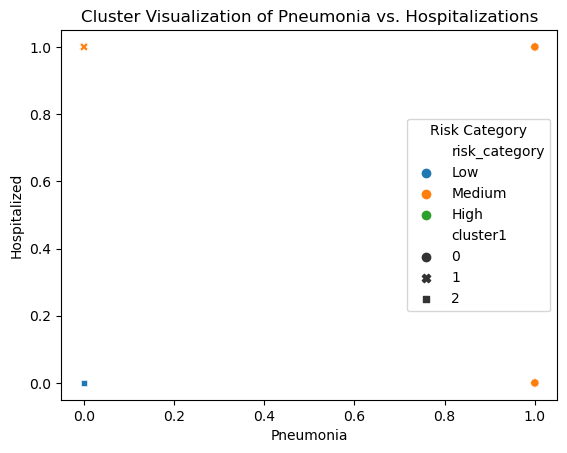

In [28]:

# Plotting and visualizing clusters
sns.scatterplot(data=train, x='pneumonia', y='is_hospitalized', hue='risk_category', style='cluster1')
plt.xlabel('Pneumonia')
plt.ylabel('Hospitalized')
plt.title('Cluster Visualization of Pneumonia vs. Hospitalizations')
plt.legend(title='Risk Category')
plt.show()

### Cluster Model 2:

In [29]:
#Choosing the features that would be used for our clustering test 2
feature_set_1 = ['copd','icu']
train_cluster=x_train[feature_set_1]
val_cluster=x_validate[feature_set_1]
test_cluster=x_test[feature_set_1]
# calculating the KMeans on all  data sets to use for modeling
train_cluster=m.calculate_kmeans(train_cluster,3)
val_cluster=m.calculate_kmeans(val_cluster,3)
test_cluster=m.calculate_kmeans(test_cluster,3)

In [30]:
#Adding cluster column to train data for modeling purposes
train['cluster2']=train_cluster['cluster']
validate['cluster2']=val_cluster['cluster']
test['cluster2']=test_cluster['cluster']

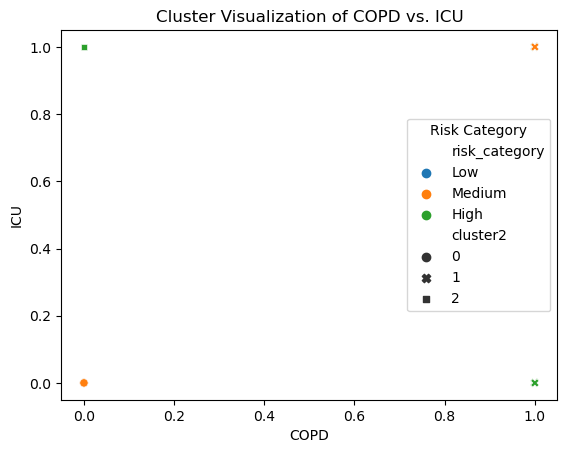

In [31]:
# Plotting and visualizing clusters
sns.scatterplot(data=train, x='copd', y='icu', hue='risk_category', style='cluster2')
plt.xlabel('COPD')
plt.ylabel('ICU')
plt.title('Cluster Visualization of COPD vs. ICU')
plt.legend(title='Risk Category')
plt.show()

## Cluster Insight:
* The analysis of the clusters reveals that their presence is not as prominent as initially anticipated. 
* Cluster Model #1 did not generate a cluster that encompasses the high-risk category.
* Cluster Model #2 successfully includes a high-risk cluster. 
* Consequently, we will employ clustering in conjunction with our best model and compare its accuracy score with the test dataset to further evaluate its performance.

# More Modeling:
* Features to be used are cluster 1, cluster 2, renal_diseas and ventilator
* Model to be used: Random Forest, max depth: 2, neighbor estimator: 10

In [32]:
#Data split between x and y variables:
x_train2=train[['cluster1','cluster2','renal_disease','ventilator']]
y_train2=train.risk_category
x_validate2=validate[['cluster1','cluster2','renal_disease','ventilator']]
y_validate2=validate.risk_category
x_test2=test[['cluster1','cluster2','renal_disease','ventilator']]
y_test2=test.risk_category

In [33]:
# function to run random forest on train and validate data
m.run_random_forest(x_train2, x_validate2, y_train2, y_validate2, 2, 10)

Random Forest Results:
Train score: 0.5143043336591724
Validate score:0.5107407672317192


### Insight:
Adding 2 clusters features to our modeling decreace accuracy to 51.1% a difference of 23% from our first model. However, the second model surpassed baseling for 3.1%.

## Running through Test Data Set:
We would be using the dataset with no clusters and utilizing each individual feature run through our test data set.

In [34]:
# function to run random forest on train and validate data
m.run_random_forest2(x_train, x_test, y_train, y_test, 2, 10)

Random Forest Results:
Train score: 0.742243838860676
Test score:0.7422358915671268


### Insight:
The test data achieved an accuracy of 74.2%, matching the accuracy of the validation data and surpassing the baseline by 26.2%.

## Modeling Summary:
* All of our models exhibit superior performance compared to the baseline accuracy of 48%.
* Among the models, the random forest with a maximum depth of 2 and 10 estimators stands out as the most favorable choice. This model demonstrates good generalization and avoids overfitting, yielding an impressive accuracy of 74.2%, surpassing the baseline by 26.2%.
* With the implementation of this model, we can confidently predict individuals with a medium level of risk before or after undergoing COVID-19 testing, contributing to effective risk assessment and management strategies.
* Adding 2 clusters features to our modeling decreace accuracy to 51.1% a difference of 23% from our first model. However, the second model surpassed baseling for 3.1%.

# Executive Summary:

- The analysis reveals a higher mortality rate among COVID-19 positive patients, but a significant number of individuals have survived.
- Positive COVID-19 cases show a significant correlation with underlying health conditions, as indicated by the Chi-Square test.
- Hospitalization is negatively correlated with positive COVID-19 cases, although a substantial number of positive cases still require hospitalization.
- Non-tobacco users have a higher proportion of positive COVID-19 cases compared to tobacco users, supported by the Chi-Square test.
- Heart problems may not have a strong correlation with positive COVID-19 cases, as individuals without heart problems have a higher rate of positive cases.
- Adults between the ages of 30 and 60+ are more likely to test positive for COVID-19, with a higher exposure risk for individuals in their 30s to 50s, potentially due to work and increased societal engagement.
- In this second iteration, we explore the integration of clustering techniques into our modeling process to uncover patterns and distinct groups within the data, enhancing accuracy and interpretability.
- Our models outperform the baseline accuracy of 48%, with the random forest model with a maximum depth of 2 and 10 estimators achieving the highest accuracy of 74.2%.
- The implementation of this model enables confident prediction of individuals with a medium level of risk before or after COVID-19 testing, contributing to effective risk assessment and management strategies.
- The test data achieved an accuracy of 74.2%, matching the accuracy of the validation data and surpassing the baseline by 26.2%.

# Recommendations and Takeways:
- Our recommendation is to utilize the current model to predict the risk level of patients presenting symptoms and with pre-existing medical conditions, considering the specific features used in this model.
- Accurately predicting the risk level of patients enables better preparation and assessment of hospitals and clinics, ensuring the provision of necessary tools, equipment, and staff for future COVID-19 patients, regardless of their test results.
- Since this dataset represents a specific demographic from Mexico, we aim to gather data from other countries to develop a more universal model applicable to hospitals and clinics worldwide.
- Given more time, further research would involve acquiring more recent data, adopting different data preparation and cleaning approaches, and obtaining additional patient information such as socio-economic status and race to enhance the model's comprehensiveness. 